In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', context='poster', palette='colorblind')
np.random.seed(0)

In [12]:
def relu(x):
    return np.maximum(x,np.zeros(np.shape(x)))

def relu_bond(x, bond): 
    return np.minimum(relu(x), np.ones(np.shape(x)) * bond)

def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

def softplus(x, beta): 
    # https://pytorch.org/docs/stable/nn.html#softplus
    return (1/beta) * np.log(1 + np.exp(beta*x))

In [13]:
# prepare for data 
rr = 3
xx = np.linspace(-rr,rr,100)

relu_yy = relu(xx)
tanh_yy = np.tanh(xx)
sigmoid_yy = sigmoid(xx)

relutanh_yy = relu(np.tanh(xx))

bond = 1
brelu_yy = relu_bond(xx, bond)

beta = 1
softplus_yy = softplus(xx, beta)

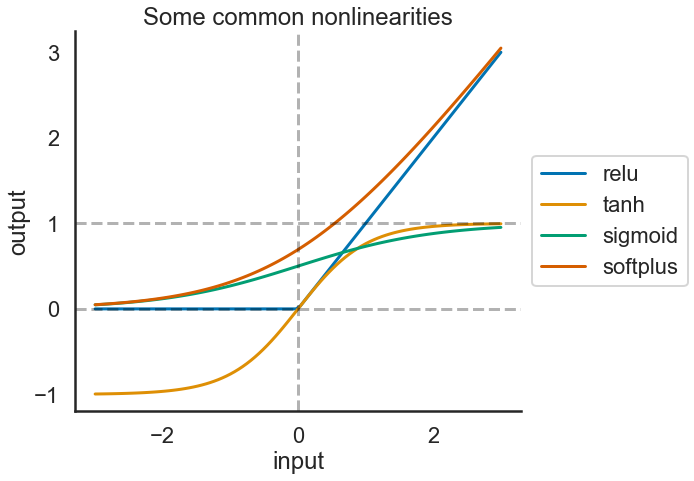

In [26]:
# plot

plt_yy = [relu_yy, tanh_yy, sigmoid_yy, softplus_yy]
plt_names = ['relu', 'tanh', 'sigmoid', 'softplus']

f, ax = plt.subplots(1,1, figsize = (10,7)) 

for yy in plt_yy: 
    ax.plot(xx, yy)

ax.set_title('Some common nonlinearities')
ax.set_xlabel('input')
ax.set_ylabel('output')

alpha_val = .3
ax.axhline(1, color='black', linestyle='--', alpha = alpha_val)
ax.axhline(0, color='black', linestyle='--', alpha = alpha_val)
ax.axvline(0, color='black', linestyle='--', alpha = alpha_val)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(plt_names, loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

f.savefig('figs/comparison.png', dpi=120)